# **Data Science In Transportation**

### Import necessary libraries


In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### Load the dataset files into DataFrames


In [96]:
train_data = pd.read_csv(r'E:\Projects\University\Data Science\Raha\Urban Traffic Flow/train.csv')
test_data = pd.read_csv(r'E:\Projects\University\Data Science\Raha\Urban Traffic Flow/test.csv')
adj_matrix_df = pd.read_csv(r'E:\Projects\University\Data Science\Raha\Urban Traffic Flow/adj_matrix.csv')


# Exploratory Data Analysis (EDA)

### Overview of the Data

In [97]:
print("Train Data:")
print("Train Data shape:", train_data.shape)
print(train_data.info())
print(train_data.head())

print("\nTest Data:")
print("Test Data shape:", test_data.shape)
print(test_data.info())
print(test_data.head())

print("\nadj matrix:")
print("adj matrix shape:", adj_matrix_df.shape)
print(adj_matrix_df.info())
print(adj_matrix_df.head())


Train Data:
Train Data shape: (45396, 52)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45396 entries, 0 to 45395
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  45396 non-null  int64  
 1   timestep    45396 non-null  int64  
 2   location    45396 non-null  int64  
 3   traffic     45396 non-null  float64
 4   prev_1      45396 non-null  float64
 5   prev_2      45396 non-null  float64
 6   prev_3      45396 non-null  float64
 7   prev_4      45396 non-null  float64
 8   prev_5      45396 non-null  float64
 9   prev_6      45396 non-null  float64
 10  prev_7      45396 non-null  float64
 11  prev_8      45396 non-null  float64
 12  prev_9      45396 non-null  float64
 13  prev_10     45396 non-null  float64
 14  feata_1     45396 non-null  float64
 15  feata_2     45396 non-null  float64
 16  feata_3     45396 non-null  float64
 17  feata_4     45396 non-null  float64
 18  feata_5     45396 non-nu

### Check for missing values


In [98]:
print("Missing values in Train Data:")
print(train_data.isnull().sum())

print("\nMissing values in Test Data:")
print(train_data.isnull().sum())


Missing values in Train Data:
Unnamed: 0    0
timestep      0
location      0
traffic       0
prev_1        0
prev_2        0
prev_3        0
prev_4        0
prev_5        0
prev_6        0
prev_7        0
prev_8        0
prev_9        0
prev_10       0
feata_1       0
feata_2       0
feata_3       0
feata_4       0
feata_5       0
hour_1        0
hour_2        0
hour_3        0
hour_4        0
hour_5        0
hour_6        0
hour_7        0
hour_8        0
hour_9        0
hour_10       0
hour_11       0
hour_12       0
hour_13       0
hour_14       0
hour_15       0
hour_16       0
hour_17       0
hour_18       0
hour_19       0
hour_20       0
hour_21       0
hour_22       0
hour_23       0
hour_24       0
no_roads      0
featb_1       0
featb_2       0
featb_3       0
featb_4       0
featc_1       0
featc_2       0
featc_3       0
featc_4       0
dtype: int64

Missing values in Test Data:
Unnamed: 0    0
timestep      0
location      0
traffic       0
prev_1        0
prev_2        0

### Check for duplicate values


In [99]:
print("Duplicate values in Train Data:")
print(train_data.duplicated().sum())

print("\nDuplicate values in Test Data:")
print(test_data.duplicated().sum())


Duplicate values in Train Data:
0

Duplicate values in Test Data:
0


### Check for unique values


In [100]:
print("Unique values in Train Data:")
print(train_data.nunique())

print("\nUnique values in Test Data:")
print(test_data.nunique())


Unique values in Train Data:
Unnamed: 0    45396
timestep       1261
location         36
traffic        1902
prev_1         1901
prev_2         1901
prev_3         1901
prev_4         1901
prev_5         1901
prev_6         1901
prev_7         1901
prev_8         1901
prev_9         1901
prev_10        1901
feata_1           2
feata_2           2
feata_3           2
feata_4           2
feata_5           2
hour_1            2
hour_2            2
hour_3            2
hour_4            2
hour_5            2
hour_6            2
hour_7            2
hour_8            2
hour_9            2
hour_10           2
hour_11           2
hour_12           2
hour_13           2
hour_14           2
hour_15           2
hour_16           2
hour_17           2
hour_18           2
hour_19           2
hour_20           2
hour_21           2
hour_22           2
hour_23           2
hour_24           2
no_roads          5
featb_1           2
featb_2           2
featb_3           2
featb_4           2
featc_1    

### Descriptive statistics

In [101]:
# Descriptive statistics of numerical features
print(train_data.describe())

# Descriptive statistics grouped by 'location'
print(train_data.groupby('location').describe())

         Unnamed: 0     timestep      location       traffic        prev_1  \
count  45396.000000  45396.00000  45396.000000  45396.000000  45396.000000   
mean   22697.500000    630.00000     17.500000      0.304270      0.303292   
std    13104.840747    364.02324     10.388409      0.199580      0.199572   
min        0.000000      0.00000      0.000000      0.000000      0.000000   
25%    11348.750000    315.00000      8.750000      0.126576      0.125175   
50%    22697.500000    630.00000     17.500000      0.293321      0.292387   
75%    34046.250000    945.00000     26.250000      0.442784      0.442317   
max    45395.000000   1260.00000     35.000000      1.000000      1.000000   

             prev_2        prev_3        prev_4        prev_5        prev_6  \
count  45396.000000  45396.000000  45396.000000  45396.000000  45396.000000   
mean       0.303242      0.303202      0.303184      0.303190      0.303224   
std        0.199618      0.199655      0.199674      0.19967

### Basic Statistics and Structure

In [102]:
# Check basic statistics of the data
print("Train Data mean:", np.mean(train_data))
print("Train Data std:", np.std(train_data))

print("\nTest Data mean:", np.mean(test_data))
print("\nTest Data std:", np.std(test_data))


Train Data mean: 449.15125811389726
Train Data std: Unnamed: 0    13104.696407
timestep        364.019230
location         10.388295
traffic           0.199577
prev_1            0.199569
prev_2            0.199615
prev_3            0.199653
prev_4            0.199671
prev_5            0.199671
prev_6            0.199651
prev_7            0.199618
prev_8            0.199575
prev_9            0.199557
prev_10           0.199572
feata_1           0.419795
feata_2           0.419795
feata_3           0.419795
feata_4           0.368972
feata_5           0.359273
hour_1            0.206002
hour_2            0.206002
hour_3            0.206002
hour_4            0.200658
hour_5            0.198838
hour_6            0.198838
hour_7            0.198838
hour_8            0.198838
hour_9            0.198838
hour_10           0.198838
hour_11           0.198838
hour_12           0.198838
hour_13           0.198838
hour_14           0.198838
hour_15           0.198838
hour_16           0.198838
hou

c:\Users\BARANLAPTOP\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


### Data Distribution

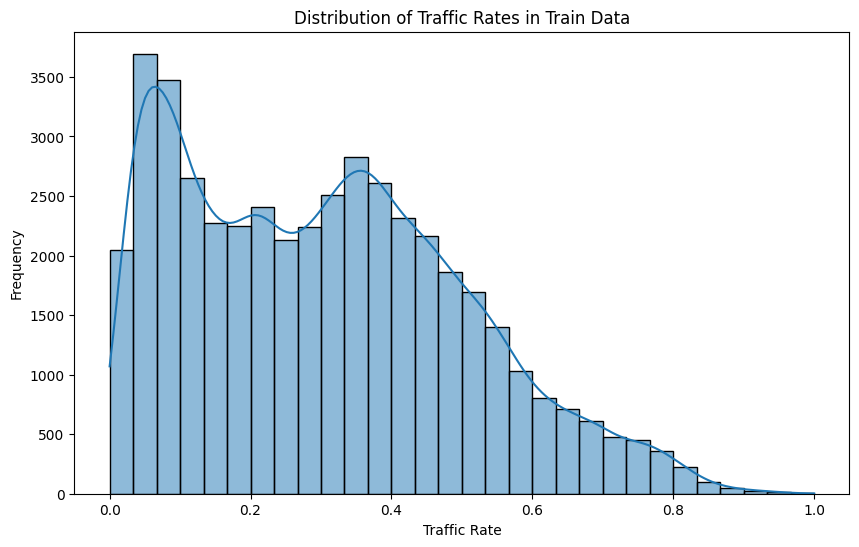

In [103]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['traffic'], bins=30, kde=True)
plt.title('Distribution of Traffic Rates in Train Data')
plt.xlabel('Traffic Rate')
plt.ylabel('Frequency')
plt.show()


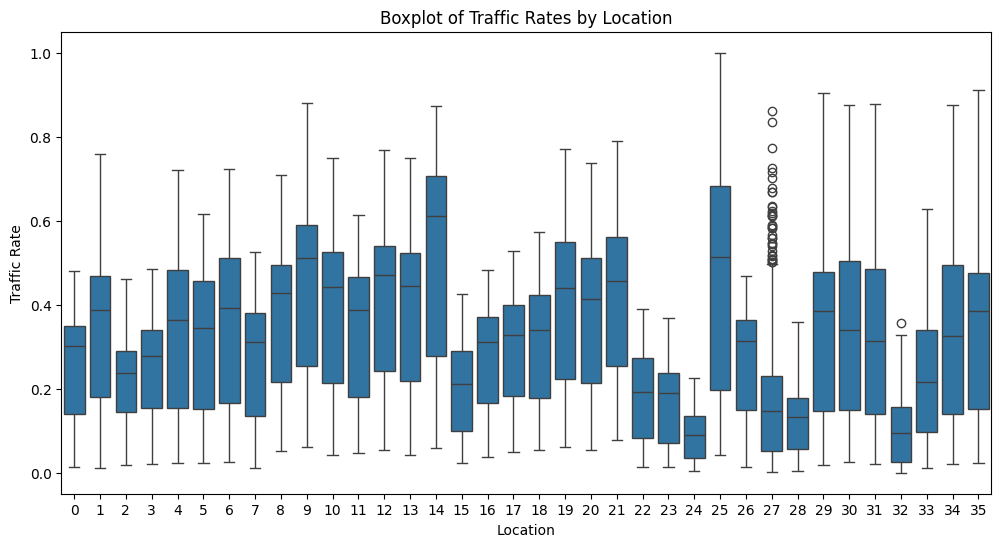

In [104]:
# Boxplot of traffic by location
plt.figure(figsize=(12, 6))
sns.boxplot(x='location', y='traffic', data=train_data)
plt.title('Boxplot of Traffic Rates by Location')
plt.xlabel('Location')
plt.ylabel('Traffic Rate')
plt.show()

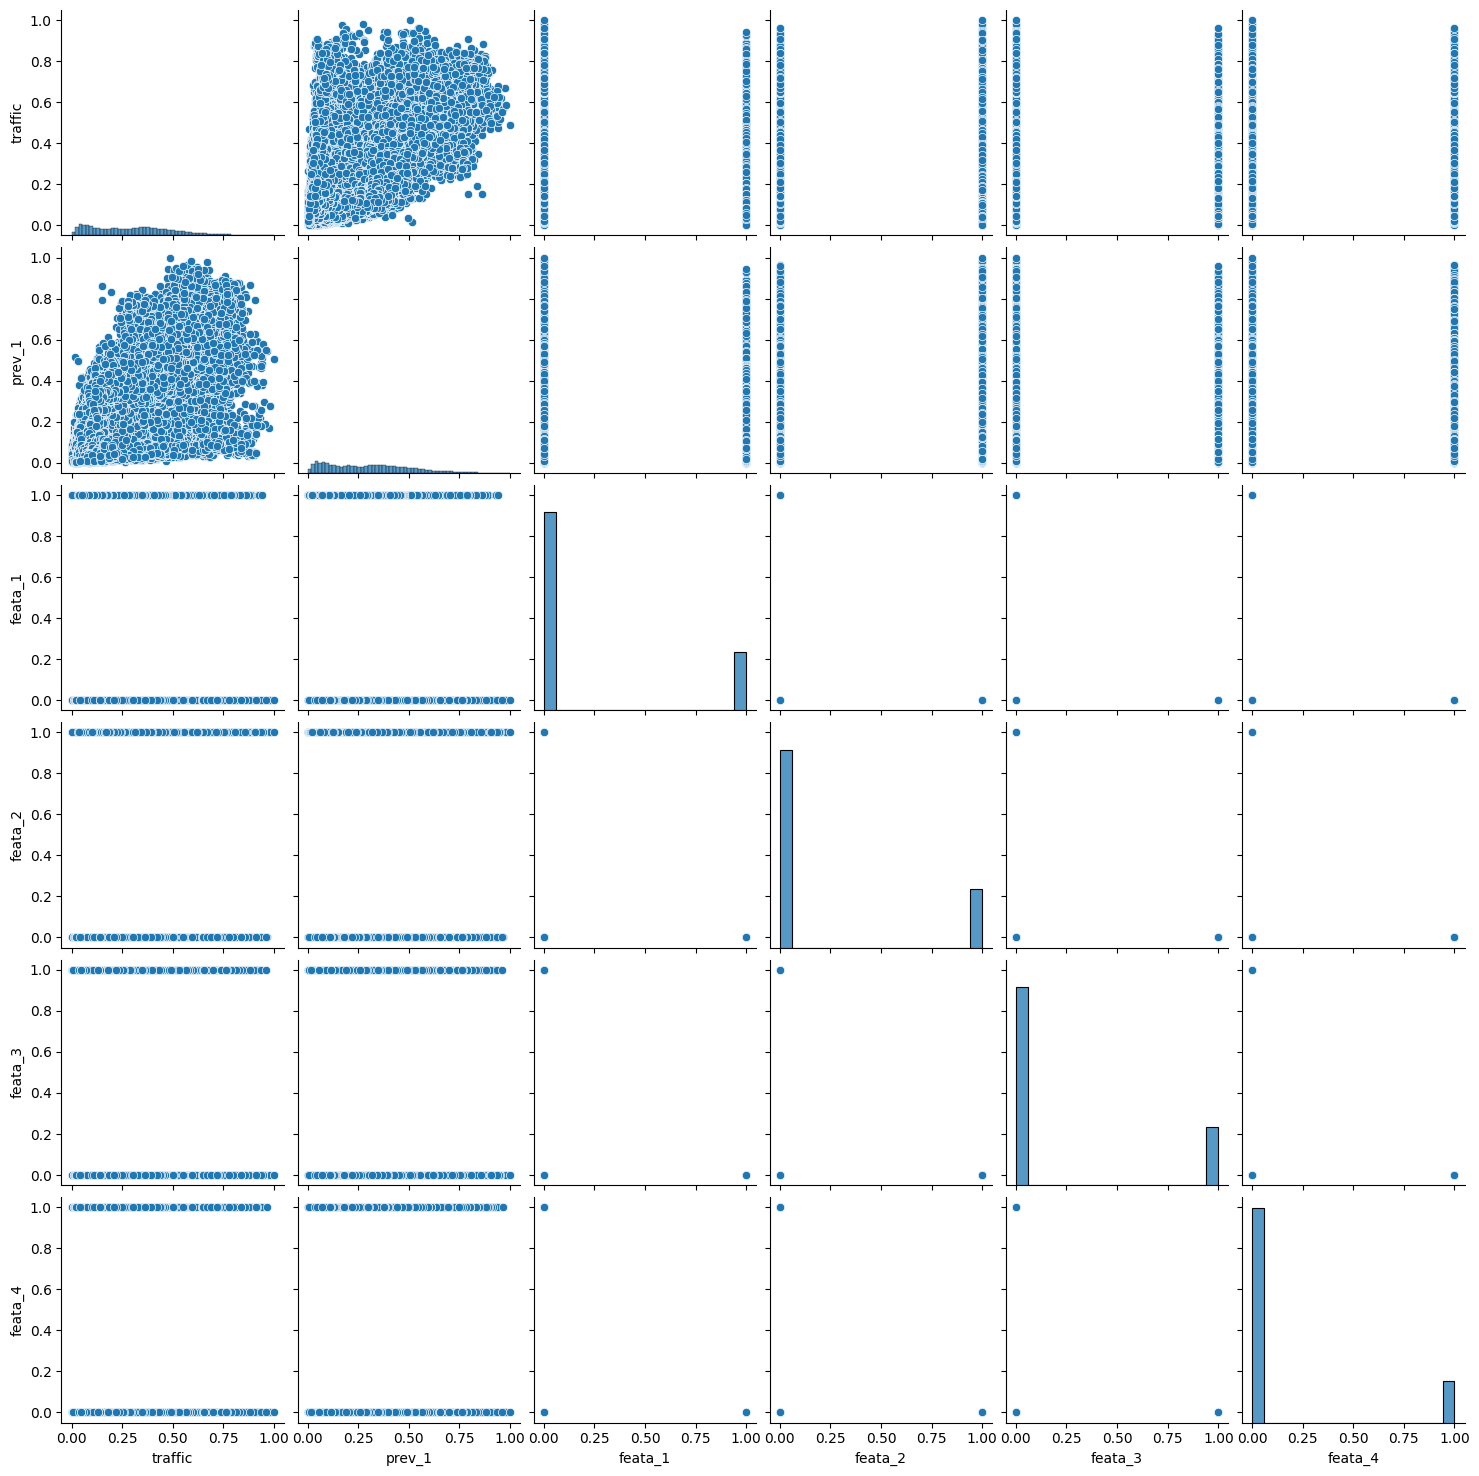

In [105]:
# Pairplot to visualize relationships between features
sns.pairplot(train_data[['traffic', 'prev_1', 'feata_1', 'feata_2', 'feata_3', 'feata_4']])
plt.show()

### Time Series Analysis


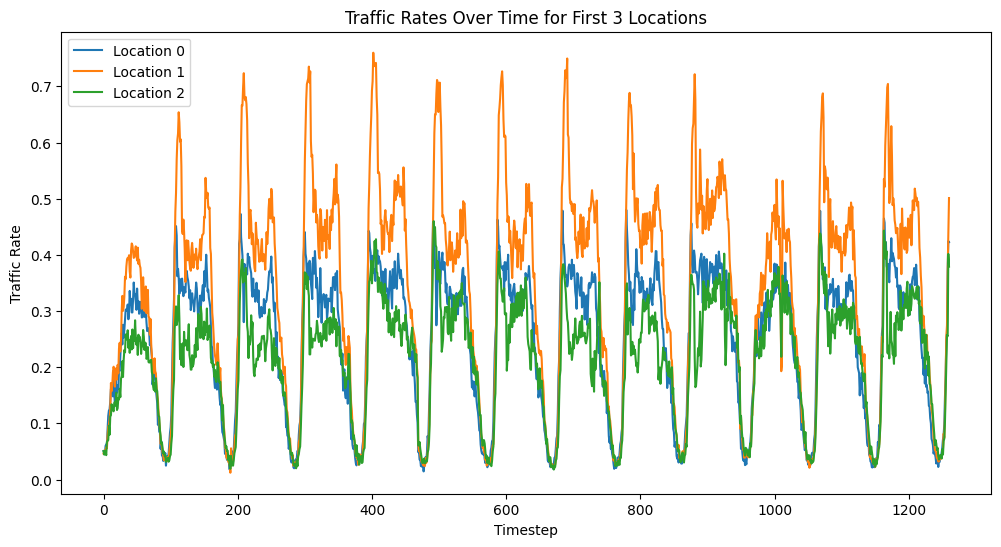

In [106]:
# Traffic rates over time for first 3 locations
plt.figure(figsize=(12, 6))
for location in train_data['location'].unique()[:3]:  # Plot for the first 3 locations
    location_data = train_data[train_data['location'] == location]
    plt.plot(location_data['timestep'], location_data['traffic'], label=f'Location {location}')

plt.title('Traffic Rates Over Time for First 3 Locations')
plt.xlabel('Timestep')
plt.ylabel('Traffic Rate')
plt.legend()
plt.show()

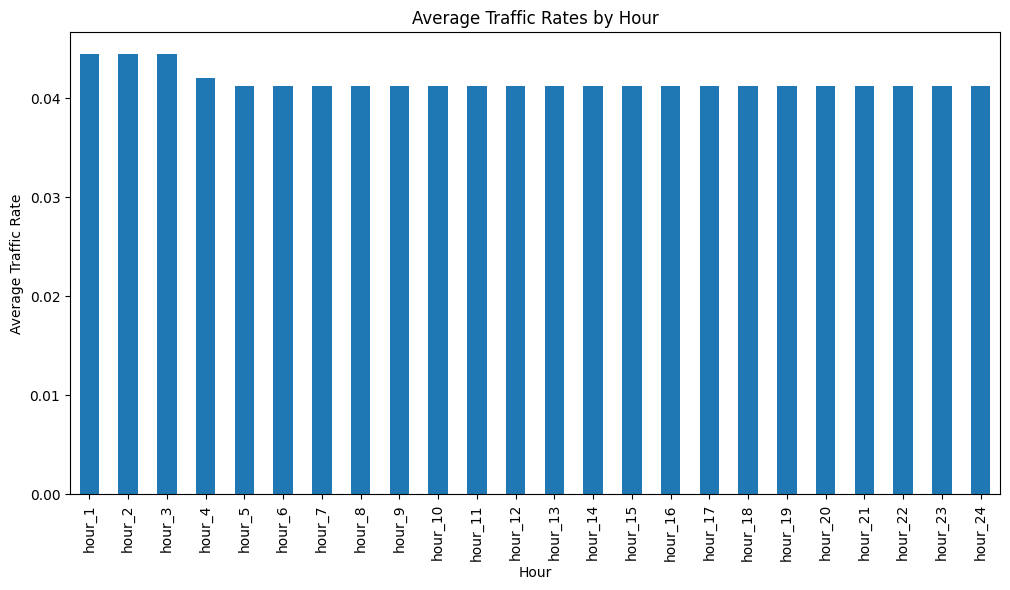

In [107]:
# Traffic rates by hour
hour_columns = [col for col in train_data.columns if col.startswith('hour_')]
traffic_by_hour = train_data[hour_columns].mean()
plt.figure(figsize=(12, 6))
traffic_by_hour.plot(kind='bar')
plt.title('Average Traffic Rates by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Traffic Rate')
plt.show()

# Correlation heatmap


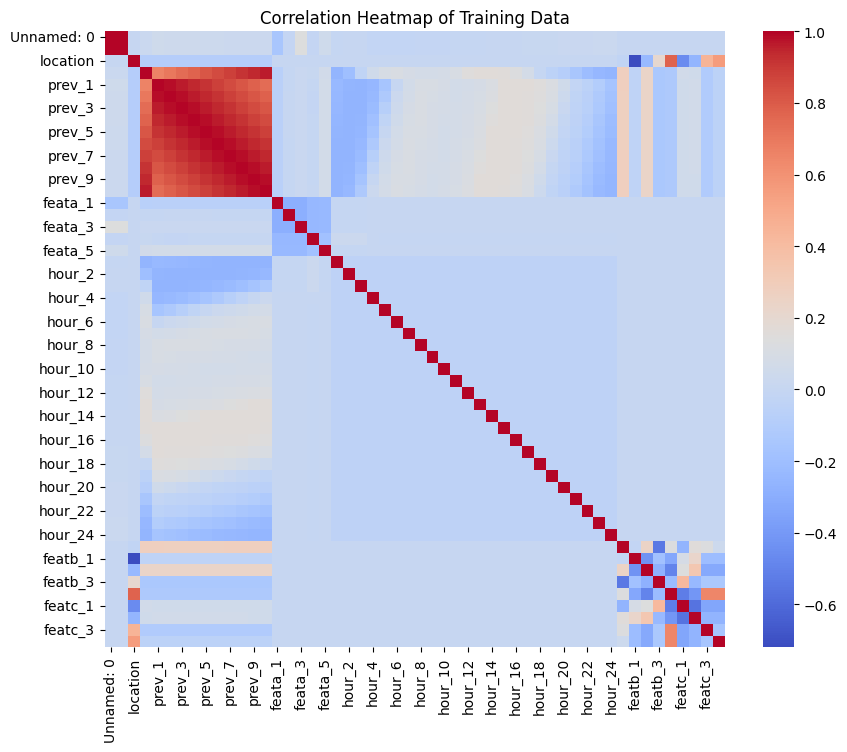

In [108]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Training Data')
plt.show()


In [109]:
# Correlation with the target variable 'traffic'
correlation_with_target = abs(train_data.corr()['traffic']).sort_values(ascending=False)
print(correlation_with_target)


traffic       1.000000
prev_10       0.962269
prev_9        0.940375
prev_8        0.914117
prev_7        0.882236
prev_6        0.847862
prev_5        0.813116
prev_4        0.777131
prev_3        0.738457
prev_2        0.699420
prev_1        0.660565
no_roads      0.275447
hour_1        0.261881
hour_24       0.259264
hour_23       0.248234
featb_2       0.237409
hour_22       0.211841
hour_2        0.200628
hour_13       0.162507
hour_14       0.161992
hour_15       0.154765
hour_21       0.151300
hour_12       0.149094
featb_3       0.136847
hour_16       0.127997
featb_4       0.124738
featc_3       0.111223
hour_6        0.107172
hour_11       0.105894
hour_5        0.096035
location      0.091654
hour_7        0.087573
hour_10       0.086032
hour_20       0.084654
hour_17       0.076598
hour_8        0.074409
hour_9        0.074292
feata_1       0.070179
feata_5       0.065570
featc_1       0.059438
featc_2       0.057674
hour_4        0.056108
featc_4       0.050332
hour_19    

### Feature Relationships

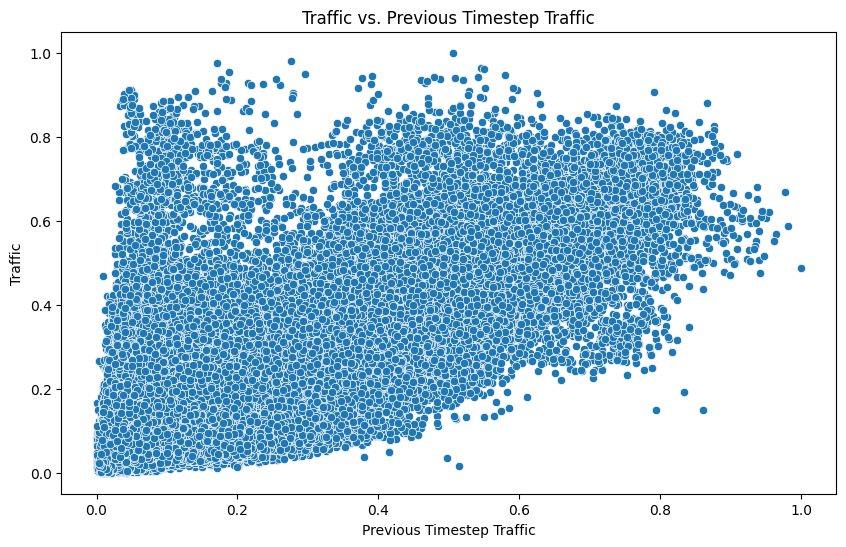

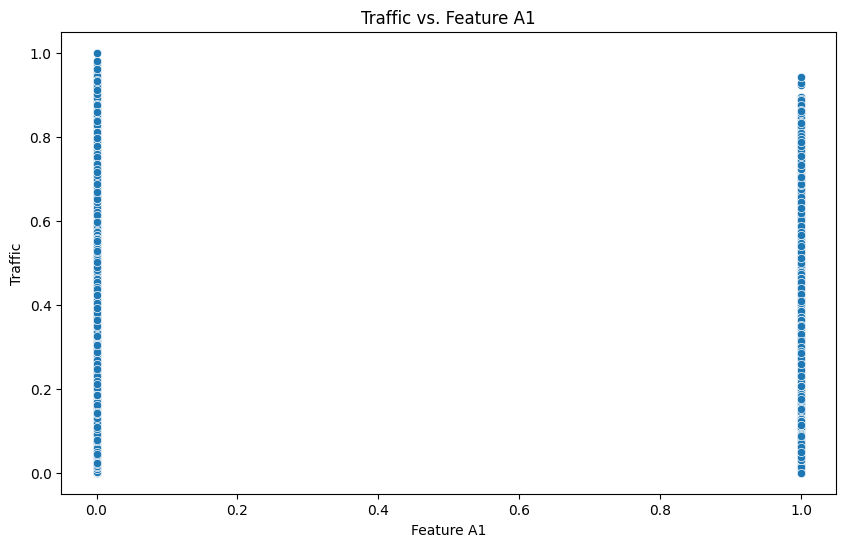

In [110]:
# Scatter plot of traffic against important features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='prev_1', y='traffic', data=train_data)
plt.title('Traffic vs. Previous Timestep Traffic')
plt.xlabel('Previous Timestep Traffic')
plt.ylabel('Traffic')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='feata_1', y='traffic', data=train_data)
plt.title('Traffic vs. Feature A1')
plt.xlabel('Feature A1')
plt.ylabel('Traffic')
plt.show()


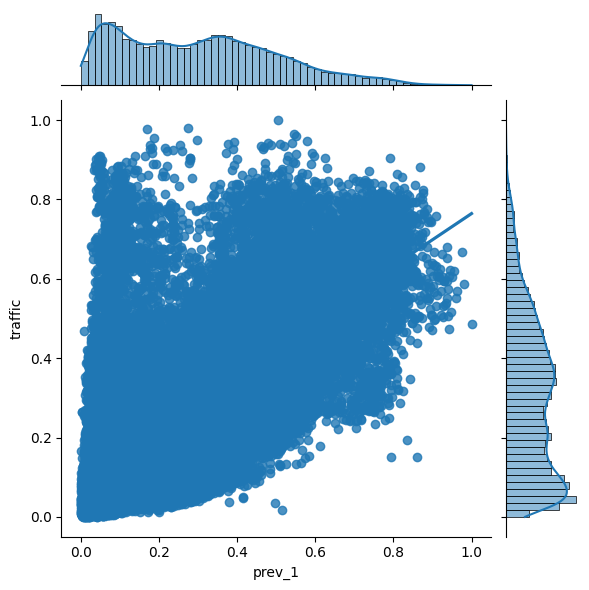

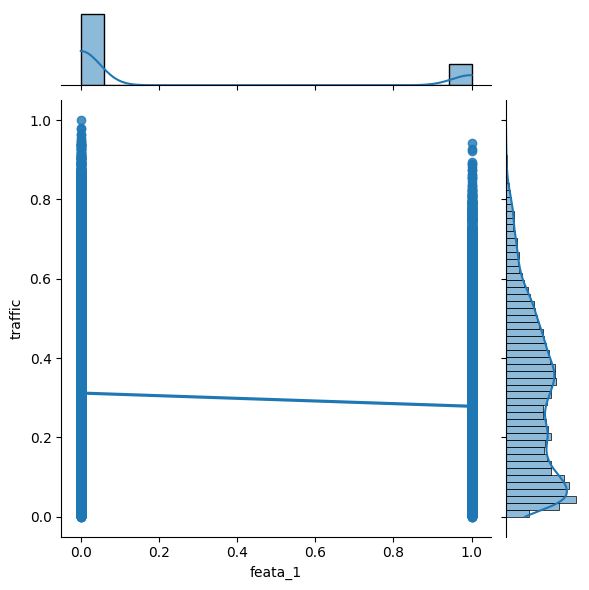

In [111]:
# Joint plots to visualize the relationship between two variables along with their distributions
sns.jointplot(x='prev_1', y='traffic', data=train_data, kind='reg')
sns.jointplot(x='feata_1', y='traffic', data=train_data, kind='reg')


### Missing Values Heatmap

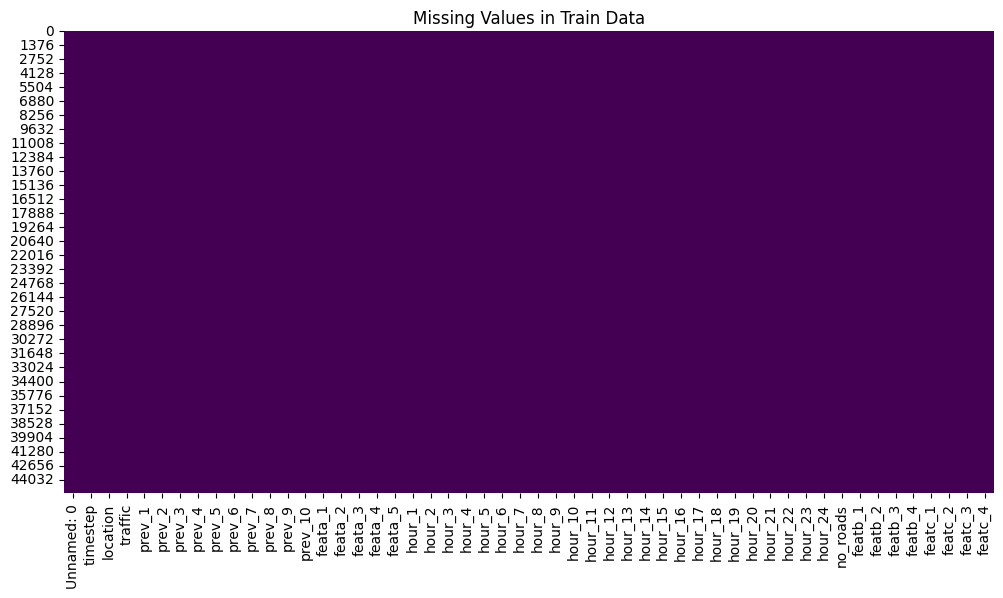

In [112]:
plt.figure(figsize=(12, 6))
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Train Data')
plt.show()


### Adjacency Matrix Analysis

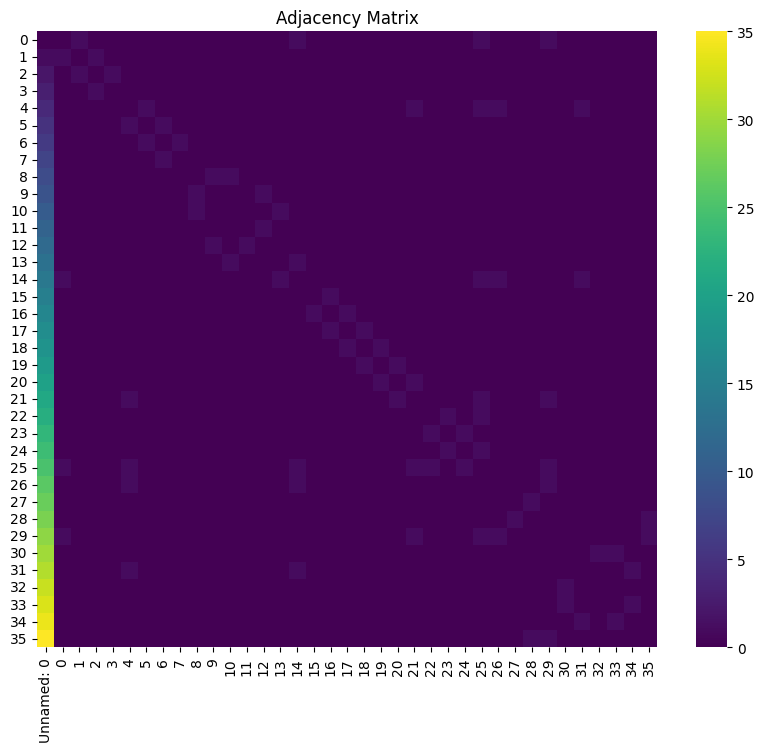

In [113]:
plt.figure(figsize=(10, 8))
sns.heatmap(adj_matrix_df, cmap='viridis')
plt.title('Adjacency Matrix')
plt.show()


### Data Cleaning and Preparation

In [114]:
train_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(test_data.mean(), inplace=True)

### Encoding Categorical Features

In [115]:
hour_columns = [col for col in train_data.columns if col.startswith('hour_')]
print("Hour Columns: ", hour_columns)

train_data = pd.get_dummies(train_data, columns=hour_columns)
test_data = pd.get_dummies(test_data, columns=hour_columns)


Hour Columns:  ['hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'hour_24']


### Normalization

In [116]:
scaler = MinMaxScaler()
train_data[['traffic']] = scaler.fit_transform(train_data[['traffic']])
test_data[['traffic']] = scaler.transform(test_data[['traffic']])


### Feature Engineering

In [117]:
for i in range(1, 4):  # Creating lag features for 3 previous time steps
    train_data[f'prev_{i}'] = train_data.groupby('location')['traffic'].shift(i)
    test_data[f'prev_{i}'] = test_data.groupby('location')['traffic'].shift(i)    

# Fill NaNs created by shifting with 0s
train_data.fillna(0, inplace=True)
test_data.fillna(0, inplace=True)

### Handling Adjacent Matrix

In [118]:
adj_matrix = adj_matrix_df.values


# Training and Testing several ML algorithms on Dataset

### Define Features and Target


In [119]:
X_train = train_data.drop(columns=['traffic'])
y_train = train_data['traffic']
X_test = test_data.drop(columns=['traffic'])
y_test = test_data['traffic']


### Split Train Data into Train and Validation Sets


In [120]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


### Define Pipelines and Parameter Grids

In [121]:
# Random Forest
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

rf_param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

# XGBoost
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor(random_state=42))
])

xgb_param_grid = {
    'xgb__n_estimators': [50, 100, 200],
    'xgb__max_depth': [3, 6, 9],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__subsample': [0.6, 0.8, 1.0]
}

# Neural Network
nn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('nn', MLPRegressor(max_iter=500, random_state=42))
])

nn_param_grid = {
    'nn__hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'nn__activation': ['relu', 'tanh'],
    'nn__solver': ['adam', 'sgd'],
    'nn__alpha': [0.0001, 0.001, 0.01]
}


### Grid Search for Each Model

In [122]:
def perform_grid_search(pipeline, param_grid, X_train, y_train):
    grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    return grid_search

# Perform grid search for each model
rf_grid_search = perform_grid_search(rf_pipeline, rf_param_grid, X_train, y_train)
xgb_grid_search = perform_grid_search(xgb_pipeline, xgb_param_grid, X_train, y_train)
nn_grid_search = perform_grid_search(nn_pipeline, nn_param_grid, X_train, y_train)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits


### Best Parameters and Scores


In [123]:
print("Best parameters for Random Forest:", rf_grid_search.best_params_)
print("Best score for Random Forest:", -rf_grid_search.best_score_)

print("\nBest parameters for XGBoost:", xgb_grid_search.best_params_)
print("Best score for XGBoost:", -xgb_grid_search.best_score_)

print("\nBest parameters for Neural Network:", nn_grid_search.best_params_)
print("Best score for Neural Network:", -nn_grid_search.best_score_)


Best parameters for Random Forest: {'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Best score for Random Forest: 0.0011077811297513513

Best parameters for XGBoost: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 9, 'xgb__n_estimators': 200, 'xgb__subsample': 1.0}
Best score for XGBoost: 0.0009916997563388888

Best parameters for Neural Network: {'nn__activation': 'relu', 'nn__alpha': 0.01, 'nn__hidden_layer_sizes': (100, 50), 'nn__solver': 'adam'}
Best score for Neural Network: 0.0010801215678010684


### Model Evaluation


In [131]:
def evaluate_model(model, X_val, y_val, model_name):
    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    r2 = r2_score(y_val, y_pred)
    print(f"{model_name} Evaluation:")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R2 Score: {r2}")  
    print("\n")
    return mae, rmse, r2

# Evaluate the best models
rf_best_model = rf_grid_search.best_estimator_
xgb_best_model = xgb_grid_search.best_estimator_
nn_best_model = nn_grid_search.best_estimator_

rf_mae, rf_rmse, rf_r2 = evaluate_model(rf_best_model, X_val, y_val, "Random Forest")
xgb_mae, xgb_rmse, xgb_r2 = evaluate_model(xgb_best_model, X_val, y_val, "XGBoost")
nn_mae, nn_rmse, nn_r2 = evaluate_model(nn_best_model, X_val, y_val, "Neural Network")


Random Forest Evaluation:
MAE: 0.02065083707642071
RMSE: 0.031920749848068496
R2 Score: 0.9744102326501495


XGBoost Evaluation:
MAE: 0.019189787445466063
RMSE: 0.02990795030927233
R2 Score: 0.9775356700770478


Neural Network Evaluation:
MAE: 0.021428725965929252
RMSE: 0.032114761288740044
R2 Score: 0.9740982227395767




### Comparison of Model Performance


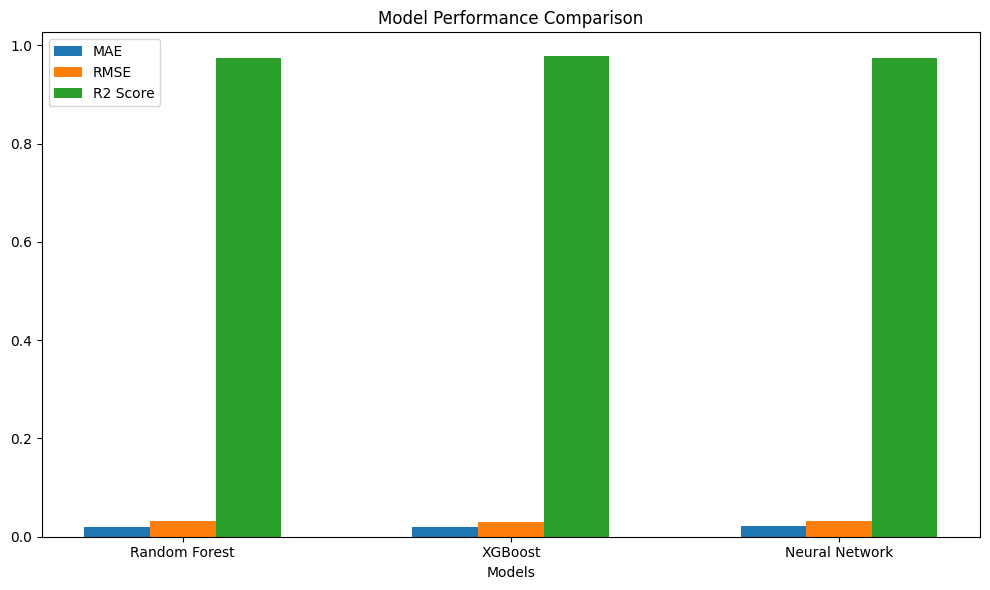

In [132]:
# Plotting the comparison of model performance
models = ['Random Forest', 'XGBoost', 'Neural Network']
mae_scores = [rf_mae, xgb_mae, nn_mae]
rmse_scores = [rf_rmse, xgb_rmse, nn_rmse]
r2_scores = [rf_r2, xgb_r2, nn_r2]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, mae_scores, width, label='MAE')
rects2 = ax.bar(x, rmse_scores, width, label='RMSE')
rects3 = ax.bar(x + width, r2_scores, width, label='R2 Score')

ax.set_xlabel('Models')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()
plt.show()

# Final Evaluation on Test Data


In [133]:
def evaluate_model_on_test(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} Evaluation on Test Data:")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R2 Score: {r2}")
    print("\n")
    return mae, rmse, r2

# Evaluate the best models on test data
rf_test_results = evaluate_model_on_test(rf_best_model, X_test, y_test, "Random Forest")
xgb_test_results = evaluate_model_on_test(xgb_best_model, X_test, y_test, "XGBoost")
nn_test_results = evaluate_model_on_test(nn_best_model, X_test, y_test, "Neural Network")


Random Forest Evaluation on Test Data:
MAE: 0.022820758623523105
RMSE: 0.03572949947557254
R2 Score: 0.9694671515129507


XGBoost Evaluation on Test Data:
MAE: 0.022450883507363798
RMSE: 0.035959903751647794
R2 Score: 0.969072095243805


Neural Network Evaluation on Test Data:
MAE: 0.02296577691978217
RMSE: 0.03426080724489035
R2 Score: 0.9719257191024974




### Compare the final results on test data


In [134]:
models = ['Random Forest', 'XGBoost', 'Neural Network']
test_results = pd.DataFrame({
    'Model': models,
    'MAE': [rf_test_results[0], xgb_test_results[0], nn_test_results[0]],
    'RMSE': [rf_test_results[1], xgb_test_results[1], nn_test_results[1]],
    'R2 Score': [rf_test_results[2], xgb_test_results[2], nn_test_results[2]],
})

print(test_results)

            Model       MAE      RMSE  R2 Score
0   Random Forest  0.022821  0.035729  0.969467
1         XGBoost  0.022451  0.035960  0.969072
2  Neural Network  0.022966  0.034261  0.971926


# Comparison and analysis of the outputs

### Visual Comparison of Metrics


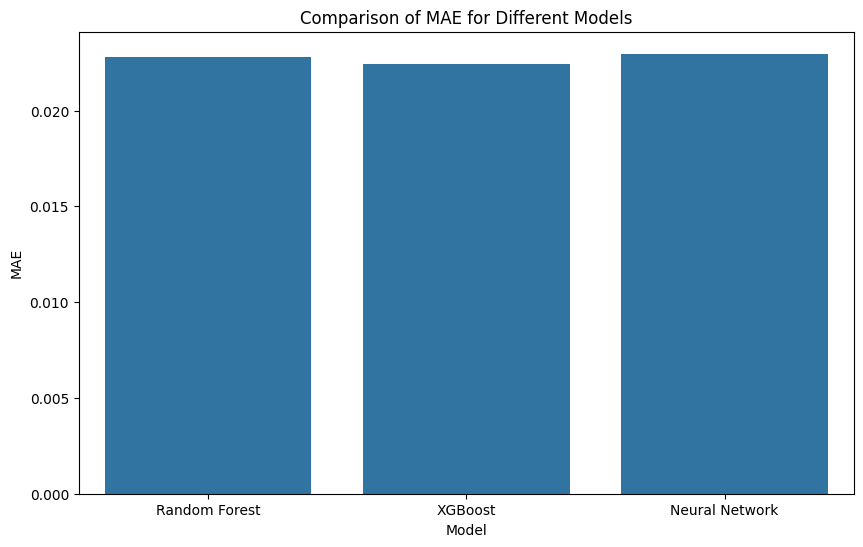

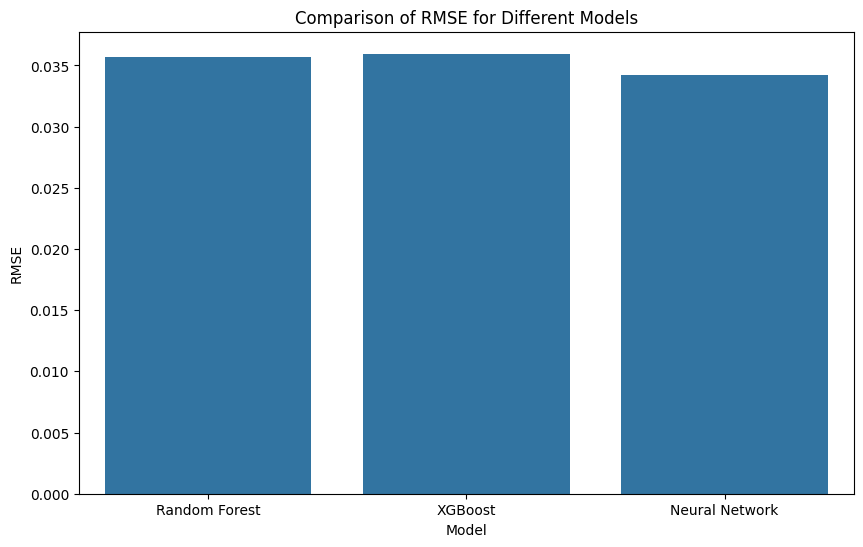

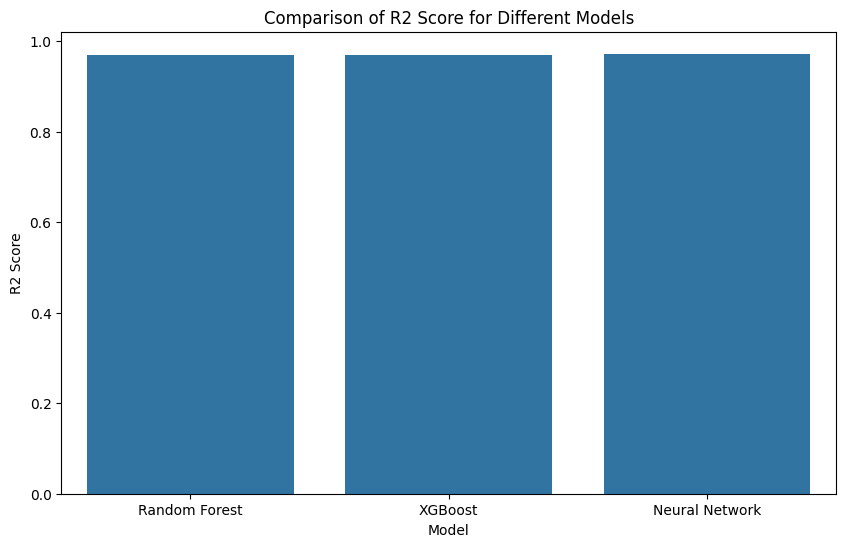

In [135]:
# Define a function to create bar plots for comparison
def plot_comparison(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y=metric_name, data=metrics)
    plt.title(f'Comparison of {metric_name} for Different Models')
    plt.ylabel(metric_name)
    plt.show()

# Plot comparisons for each metric
plot_comparison(test_results, 'MAE')
plot_comparison(test_results, 'RMSE')
plot_comparison(test_results, 'R2 Score')


### Summary of Model Performance


In [136]:
# Summarize the comparison in text
def summarize_comparison(results):
    best_mae_model = results.loc[results['MAE'].idxmin()]['Model']
    best_rmse_model = results.loc[results['RMSE'].idxmin()]['Model']
    best_r2_model = results.loc[results['R2 Score'].idxmax()]['Model']

    print("Summary of Model Performance:")
    print(f"Best MAE Model: {best_mae_model}")
    print(f"Best RMSE Model: {best_rmse_model}")
    print(f"Best R2 Score Model: {best_r2_model}")

summarize_comparison(test_results)

Summary of Model Performance:
Best MAE Model: XGBoost
Best RMSE Model: Neural Network
Best R2 Score Model: Neural Network


# All models perform well
### And in Training and Validation part XGBoost performed better
### But in Testing part Neural Network performed better
